<a href="https://colab.research.google.com/github/mayankraj25/PyTorch/blob/main/Pytorch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
#Number(float)
t1=torch.tensor(4.)
print(t1)

#Vector
t2=torch.tensor([1.,2,3,4]) #Tensor just stors a single type of datatype hence all of it turns to float
print(t2)

#Matrix
t3=torch.tensor([[5.,6],[7,8],[9,10]])
print(t3)

#3D Array
t4=torch.tensor([[[11,12,13],[13,14,15]],[[15,16,17],[17,18,19]]])
print(t4)

tensor(4.)
tensor([1., 2., 3., 4.])
tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])
tensor([[[11, 12, 13],
         [13, 14, 15]],

        [[15, 16, 17],
         [17, 18, 19]]])


In [ ]:
print(t1.dtype)
print(t2.dtype)
print(t3.dtype)
print(t4.dtype)

torch.float32
torch.float32
torch.float32
torch.int64


In [ ]:
print(t1)
print(t1.shape)
print(t2)
print(t2.shape)
print(t3)
print(t3.shape)
print(t4)
print(t4.shape)

tensor(4.)
torch.Size([])
tensor([1., 2., 3., 4.])
torch.Size([4])
tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])
torch.Size([3, 2])
tensor([[[11, 12, 13],
         [13, 14, 15]],

        [[15, 16, 17],
         [17, 18, 19]]])
torch.Size([2, 2, 3])


In [ ]:
#Create Tensors
x=torch.tensor(3.)
w=torch.tensor(4.,requires_grad=True)
b=torch.tensor(5.,requires_grad=True)

#Arithematic operation
y=w*x+b
print(y)

#Computing Derivative
y.backward()
#Display Gradients (Gradient is just another name for drivative)
print('dy/dx:',x.grad)
print('dy/dw:',w.grad)
print('dy/db:',b.grad)

tensor(17., grad_fn=<AddBackward0>)
dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


In [ ]:
import numpy as np
x=np.array([[1,2],[3,4.]])
print(x)
print(x.dtype)
y=torch.from_numpy(x)
print(y)
print(y.dtype)
z=y.numpy()
print(z)

[[1. 2.]
 [3. 4.]]
float64
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)
torch.float64
[[1. 2.]
 [3. 4.]]


In [ ]:
#Linear Regression - y=w.x+b
#Where w is the weight and b is he bias
#for our example the whole equation will look like ->
#yield_apple  = w11 * temp + w12 * rainfall + w13 * humidity + b1
#yield_orange = w21 * temp + w22 * rainfall + w23 * humidity + b2

# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype='float32')

In [ ]:
inputs=torch.from_numpy(inputs)
targets=torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [ ]:
#Getting random values in a matrix of dimension 2,3 for the w values (this is ust to understand linear regression the real model requires proper w & b values)
#Random values for 2 biases as well

w=torch.randn(2,3,requires_grad=True)
b=torch.randn(2,requires_grad=True)
print(w)
print(b)

tensor([[ 0.1075, -0.4134, -0.9570],
        [-1.4586,  0.7379, -1.1585]], requires_grad=True)
tensor([ 0.3973, -0.1031], requires_grad=True)


In [ ]:
#y=w.x+b
# @-> Matrix multiplication
# .t()->Transpose

def model(x):
    return x@w.t()+b

In [ ]:
preds=model(inputs)
print(preds)
print(targets)

#These are far off and that is because of the random w & b values

tensor([[ -60.6013, -106.9563],
        [ -87.4438, -142.0439],
        [-101.1504,  -95.3148],
        [ -41.8180, -160.0133],
        [ -98.8592, -111.0034]], grad_fn=<AddBackward0>)
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


**Loss function**

Before we improve our model, we need a way to evaluate how well our model is performing. We can compare the model’s predictions with the actual targets, using the following method:
* Calculate the difference between the two matrices (preds and targets).
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.

The result is a single number, known as the mean squared error (MSE).

⸻


In [ ]:
def mse(t1,t2):
    diff=t1-t2
    return torch.sum(diff*diff)/diff.numel()

#torch.sum() returs the sum of all the elements in the tensor
#.numel() returns the number of elements in the tensor

In [ ]:
#Compute loss in our example
loss=mse(preds,targets)
print(loss)

tensor(36948.2617, grad_fn=<DivBackward0>)


In [ ]:
loss.backward()

In [ ]:
print(w)
print(w.grad)

tensor([[ 0.1075, -0.4134, -0.9570],
        [-1.4586,  0.7379, -1.1585]], requires_grad=True)
tensor([[-12686.2168, -14851.6299,  -9010.8779],
        [-18172.7598, -18878.0078, -11959.1865]])


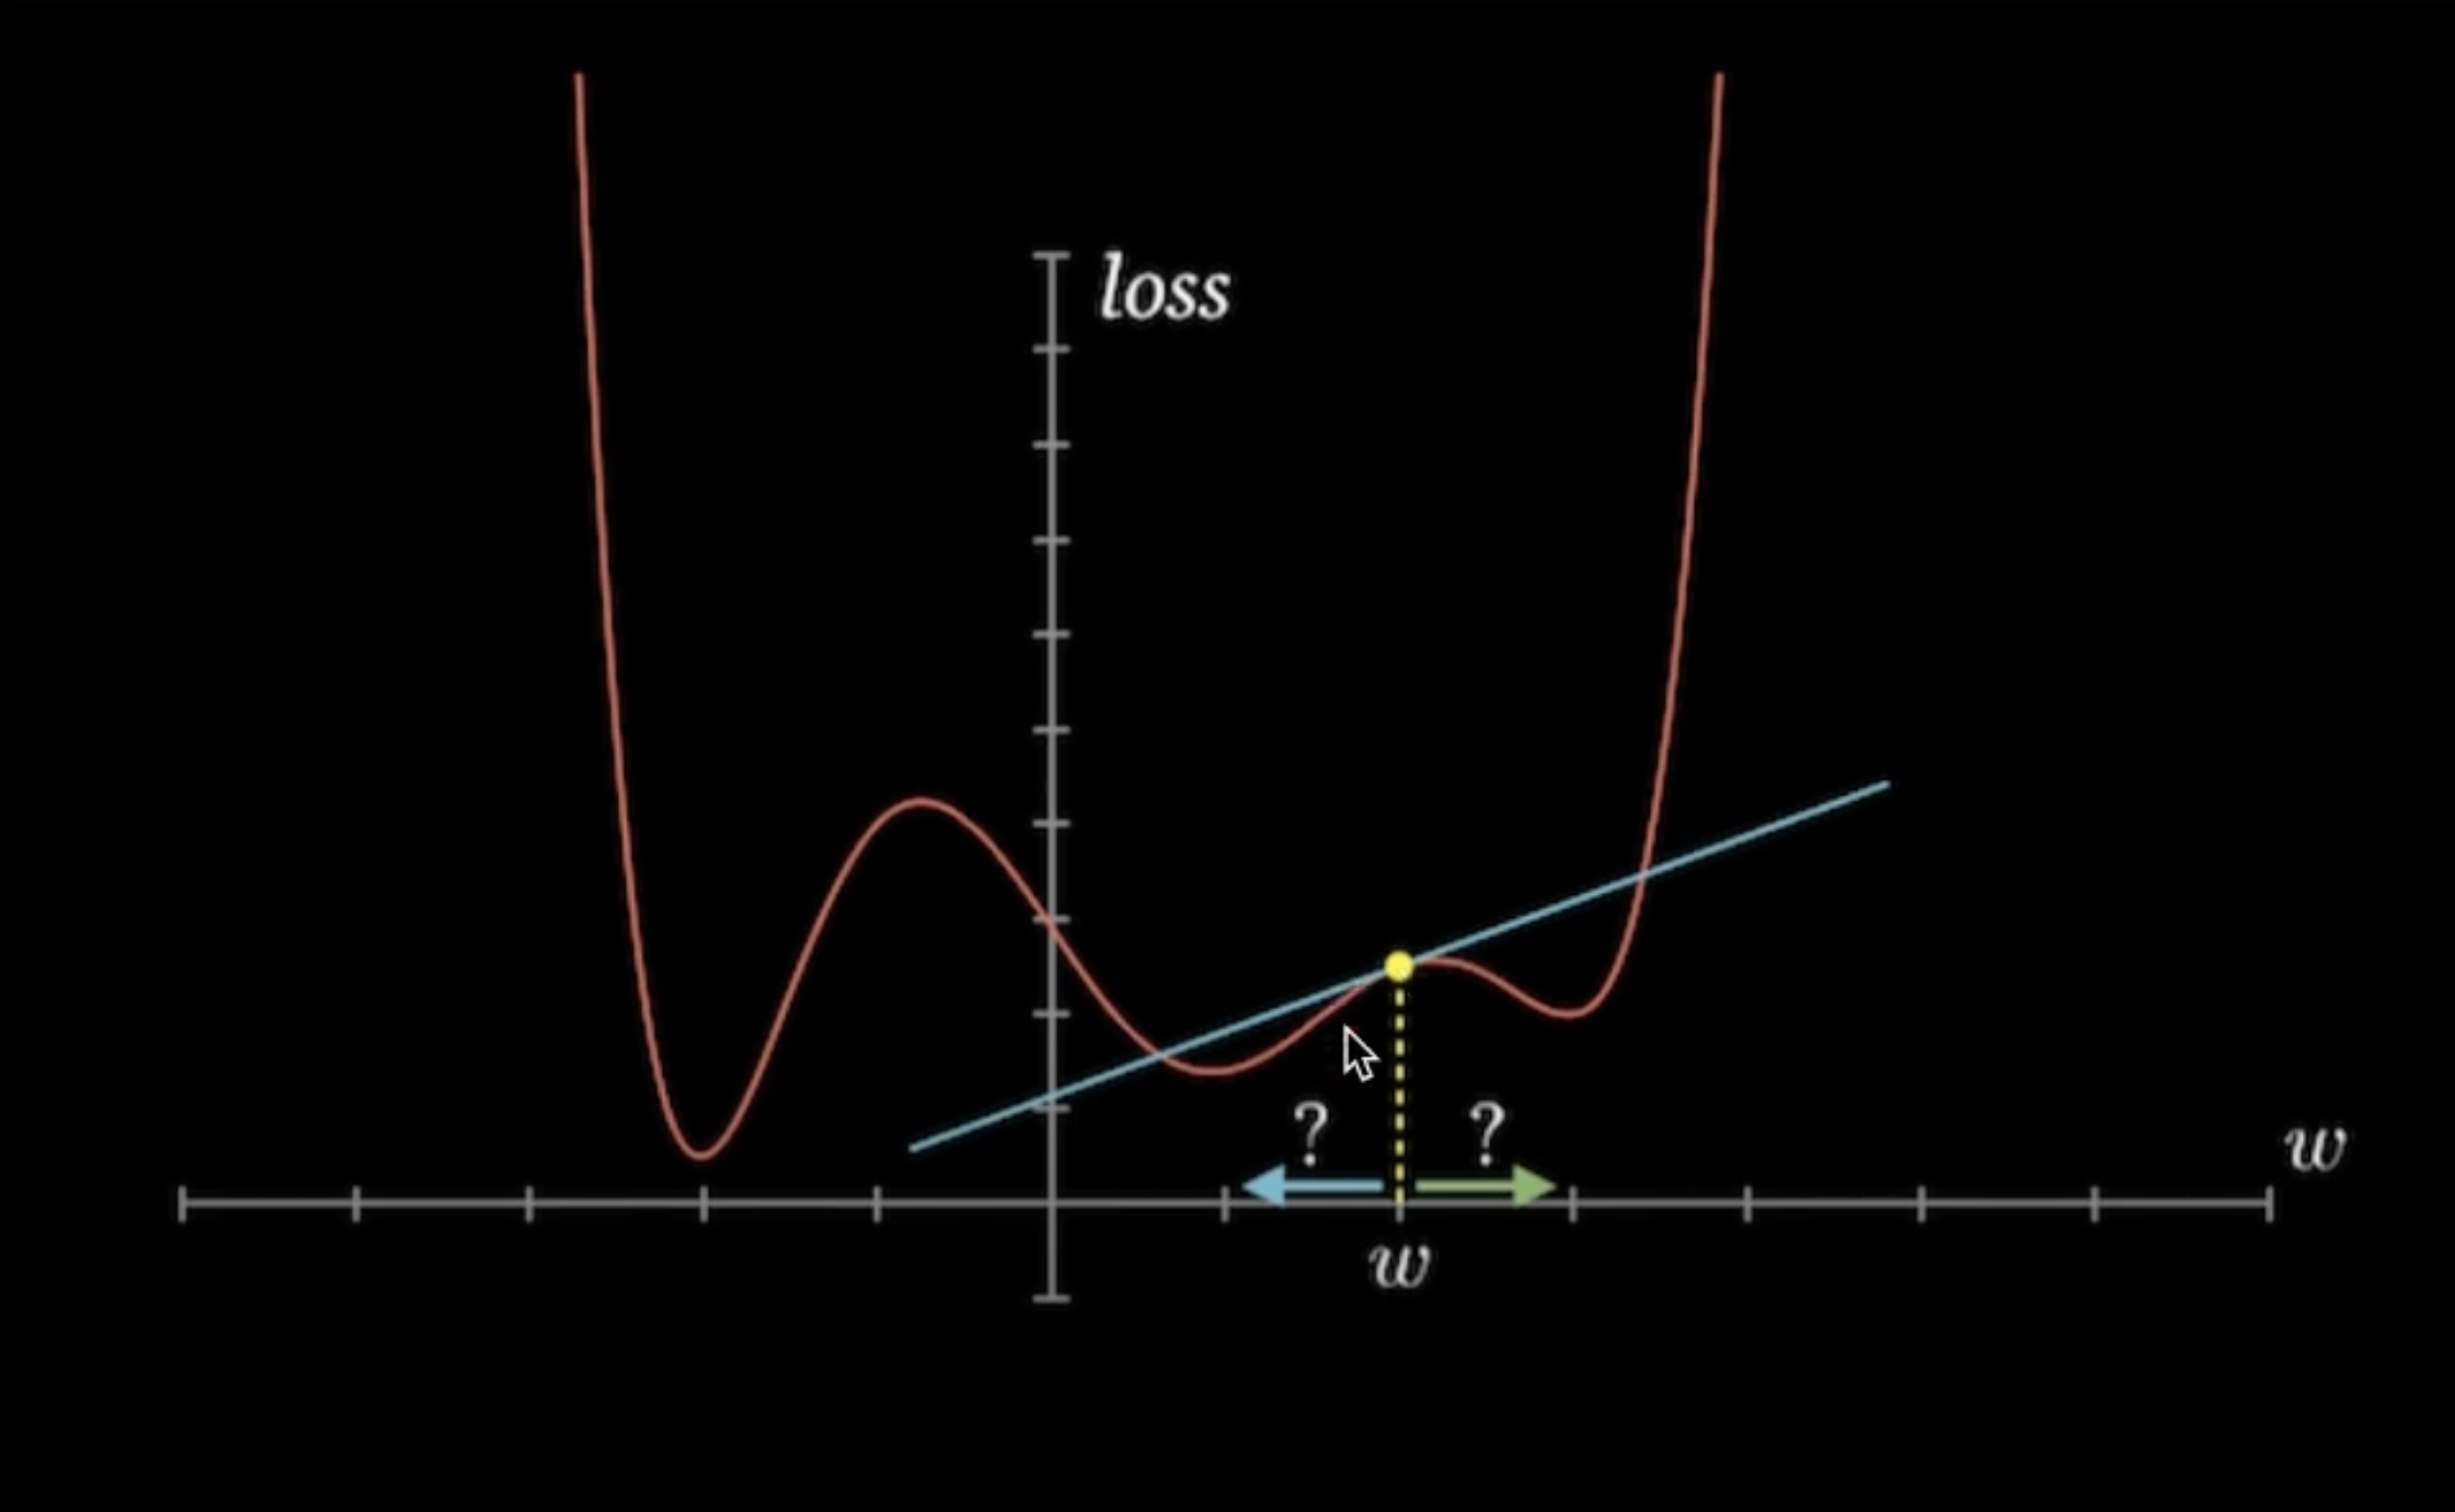

If the gradient in negetive reducing the value of w will reduce the loss function

If gradient in positive increasing the value of w will reduce the loss function

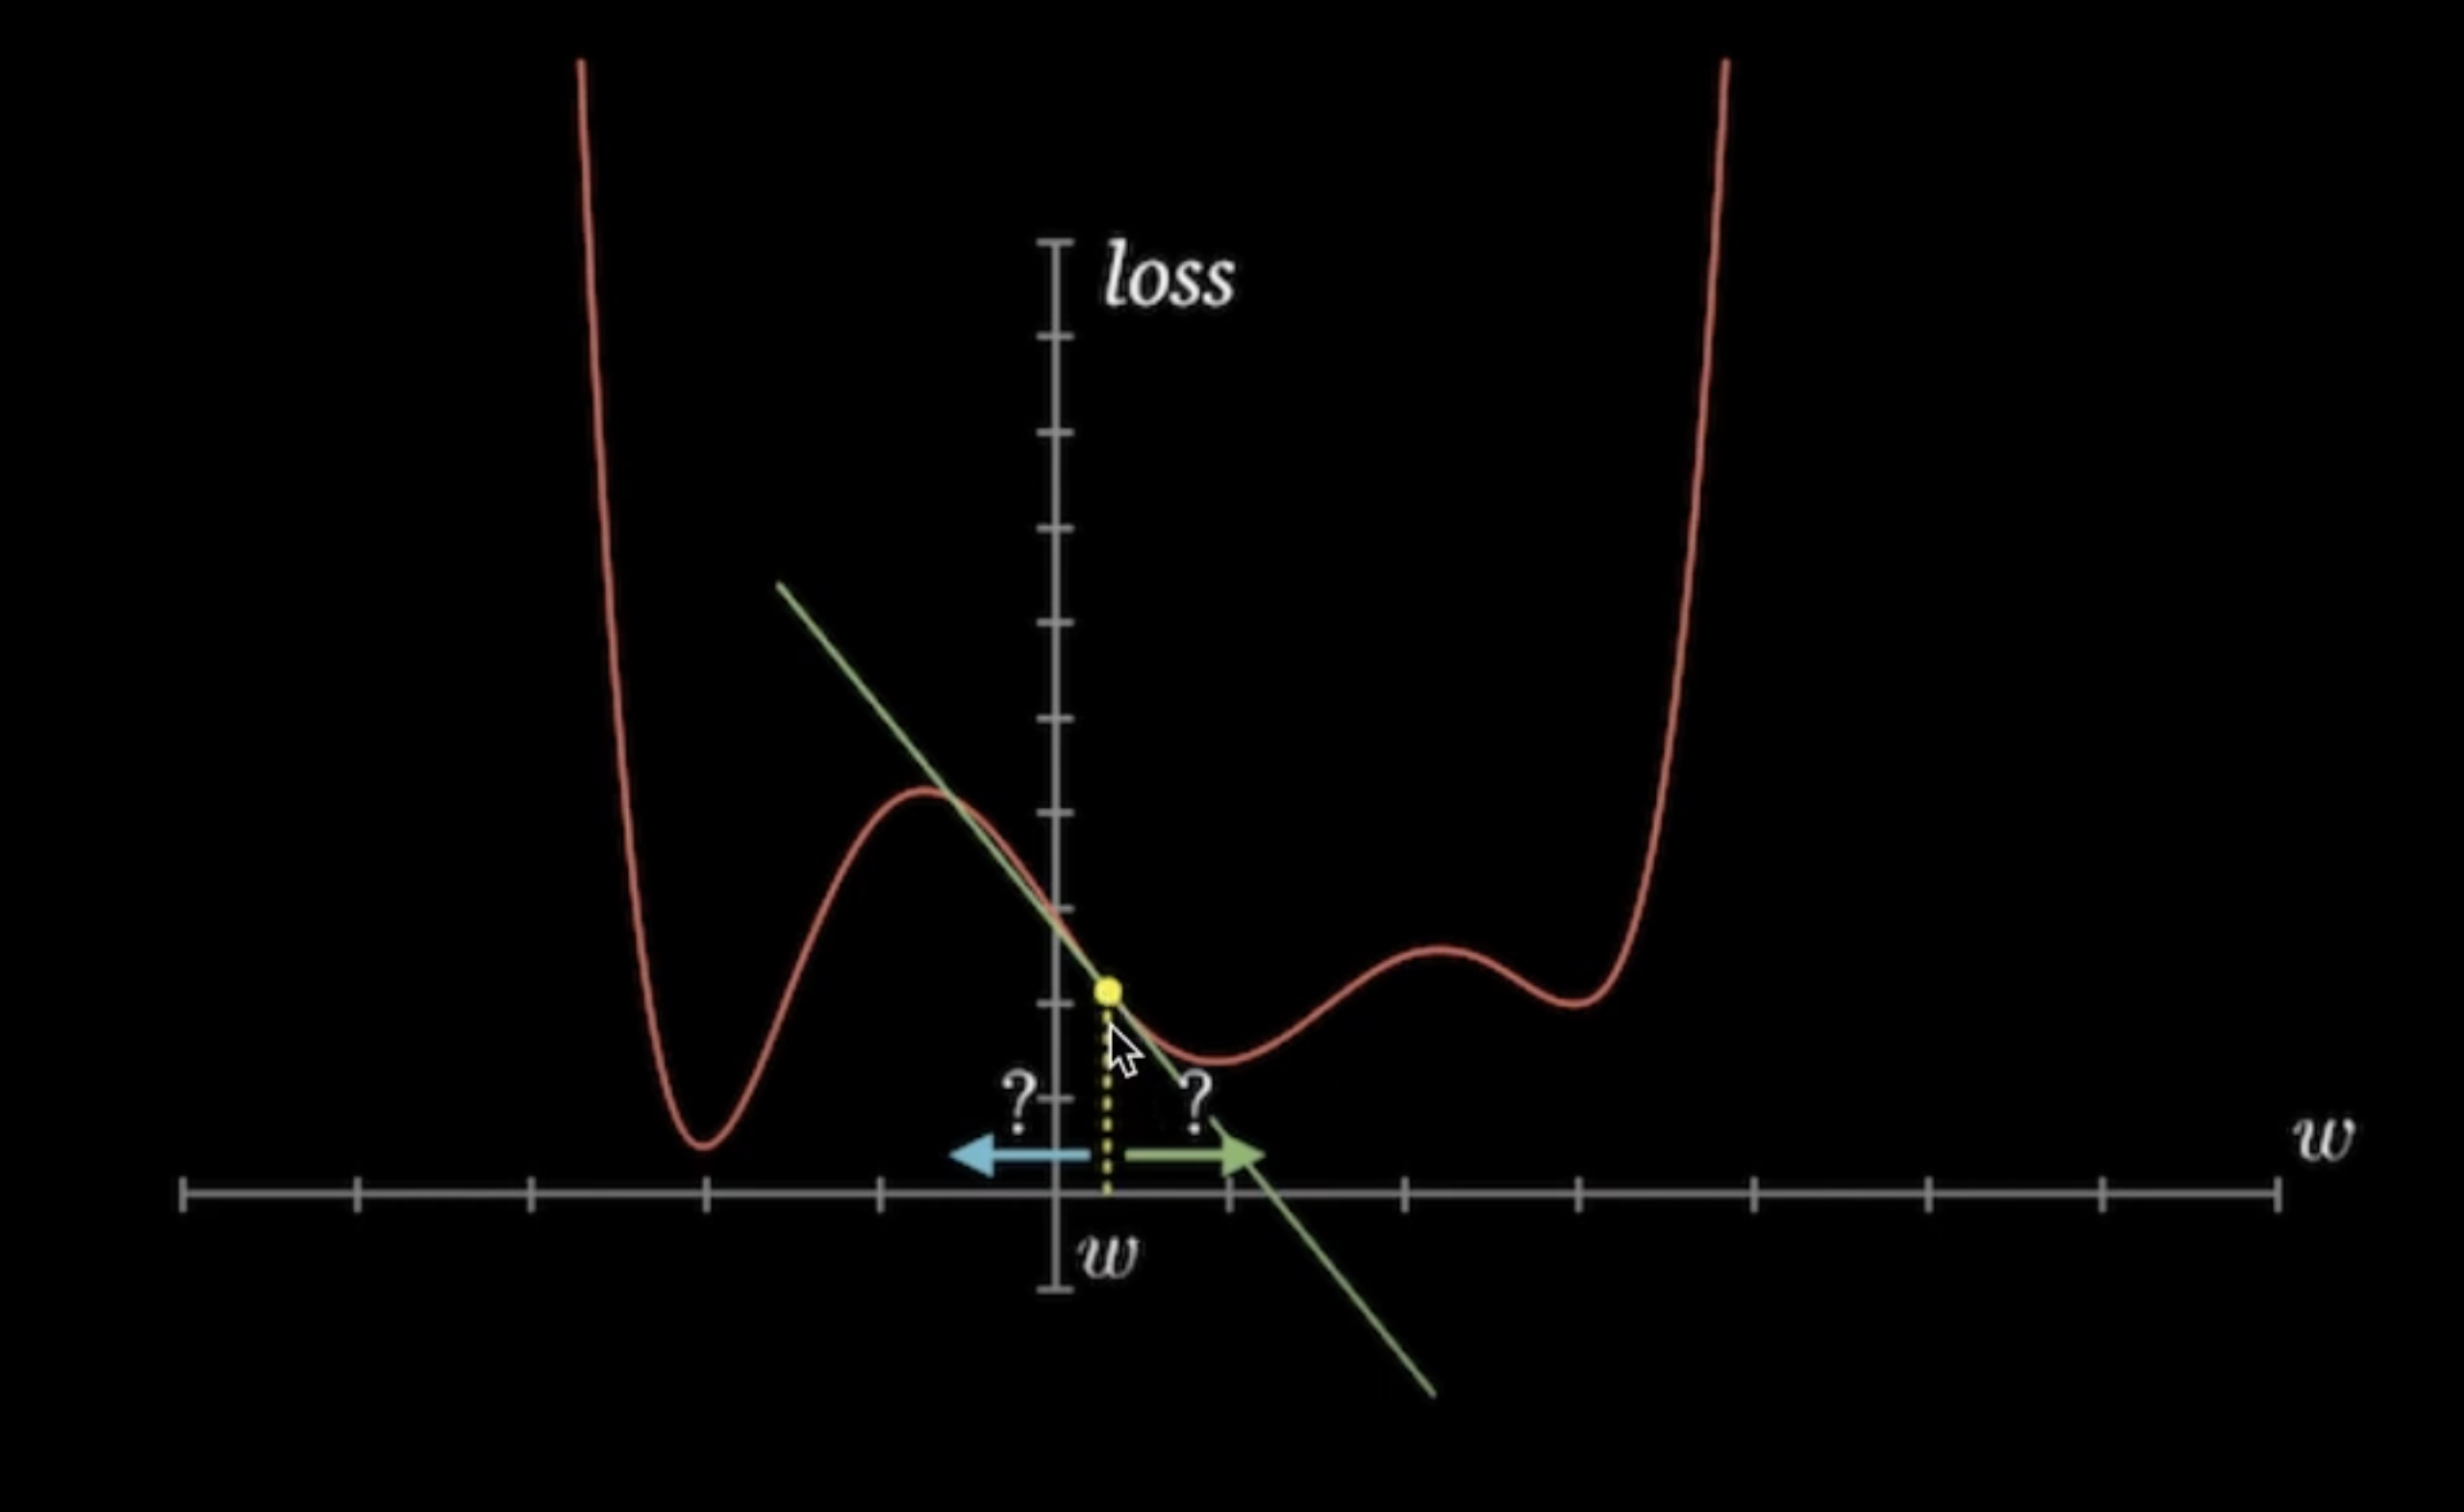

#Adjust weights and biases using gradient descent
We'll reduce the loss and improve our model using the gradient descent optimization algorithm, which has the following steps:
1.	Generate predictions
2.	Calculate the loss
3.	Compute gradients w.r.t the weights and biases
4.	Adjust the weights by subtracting a small quantity proportional to the gradient
5.	Reset the gradients to zero